In [153]:
import numpy as np
import torch
from model_kitti_2012 import StereoNet
import utils as utils
import matplotlib.pyplot as plt
from pytorch_lightning.utilities.model_summary import ModelSummary

In [154]:
# path_to_left_rgb_image_file = \
# r'D:\engineering_thesis_data\Kitti_2012\data_stereo_flow\training\colored_0\000000_10.png'
# path_to_right_rgb_image_file = \
# r'D:\engineering_thesis_data\Kitti_2012\data_stereo_flow\training\colored_1\000000_10.png'
# path_to_left_disp_file = \
# r'D:\engineering_thesis_data\Kitti_2012\data_stereo_flow\training\disp_noc\000000_10.pfm' 

# path_to_left_rgb_image_file = \
# r'D:\engineering_thesis_data\Kitti_2015\data_scene_flow\training\image_2\000019_10.png'
# path_to_right_rgb_image_file = \
# r'D:\engineering_thesis_data\Kitti_2015\data_scene_flow\training\image_3\000019_10.png'
# path_to_left_disp_file = \
# r'D:\engineering_thesis_data\Kitti_2015\data_scene_flow\training\disp_noc_0\000019_10.pfm' 

# path_to_left_rgb_image_file = \
# r'D:\engineering_thesis_data\SceneFlow\Monkaa\frames\webp\eating_x2\left\0009.webp'
# path_to_right_rgb_image_file = \
# r'D:\engineering_thesis_data\SceneFlow\Monkaa\frames\webp\eating_x2\right\0009.webp'
# path_to_left_disp_file = \
# r'D:\engineering_thesis_data\SceneFlow\Monkaa\disparity\eating_x2\left\0009.pfm'

# path_to_left_rgb_image_file = \
# r'D:\engineering_thesis_data\SceneFlow\FlyingThings3D\frames\TRAIN\C\0017\left\0007.webp'
# path_to_right_rgb_image_file = \
# r'D:\engineering_thesis_data\SceneFlow\FlyingThings3D\frames\TRAIN\C\0017\right\0007.webp'
# path_to_left_disp_file = \
# r'D:\engineering_thesis_data\SceneFlow\FlyingThings3D\disparity\TRAIN\C\0017\left\0007.pfm'

path_to_left_rgb_image_file = \
r'D:\engineering_thesis_data\SceneFlow\Driving\frames\35mm_focallength\scene_backwards\fast\left\0087.webp'
path_to_right_rgb_image_file = \
r'D:\engineering_thesis_data\SceneFlow\Driving\frames\35mm_focallength\scene_backwards\fast\right\0087.webp'
path_to_left_disp_file = \
r'D:\engineering_thesis_data\SceneFlow\Driving\disparity\35mm_focallength\scene_backwards\fast\left\0087.pfm'


In [155]:
# Load in the image pair as numpy uint8 arrays
sample = {'left': utils.webp_loader(path_to_left_rgb_image_file),
          'right': utils.webp_loader(path_to_right_rgb_image_file)
          }

# sample = {'left': utils.image_loader(path_to_left_rgb_image_file),
#           'right': utils.image_loader(path_to_right_rgb_image_file)
#           }


In [156]:
# disp_gt = utils.pfm_loader(path_to_left_disp_file)
disp_gt, scale = utils.pfm_loader(path_to_left_disp_file)
print(type(disp_gt), disp_gt.max(), disp_gt.min())

<class 'numpy.ndarray'> 269.51248 1.3612565


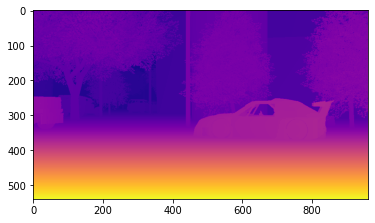

In [157]:
# plt.imshow(disp_gt[0])
plt.imshow(disp_gt, cmap='plasma')

In [158]:
# Transform the single image pair into a torch.Tensor then into a
# batch of shape [batch, channel, height, width]
transformers = [
    utils.ToTensor(), 
    utils.PadSampleToBatch(),
    utils.Rescale()
    ]
    
for transformer in transformers:
    sample = transformer(sample)


In [159]:
print(type(sample))
print(sample.keys())

print(type(sample['left']))
print(sample['left'].shape)
print(sample['left'].max())
print(sample['left'].min())

<class 'dict'>
dict_keys(['left', 'right'])
<class 'torch.Tensor'>
torch.Size([1, 3, 540, 960])
tensor(0.9373)
tensor(-1.)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


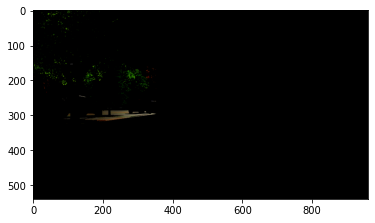

In [160]:
plt.imshow(sample['left'].squeeze().moveaxis(0, 2))

In [161]:
base_model = StereoNet.load_from_checkpoint(
    r'D:\__repos\engineering_thesis\experiments\model_checkpoints\lightning_logs\epoch=20-step=744533.ckpt'
    )

In [162]:
model = StereoNet.load_from_checkpoint(

    # BEST SCENE FLOW
    # r'D:\__repos\engineering_thesis\experiments\src\stereonet\lightning_logs\version_38\checkpoints\epoch=2-step=864006.ckpt'

    # BEST KITTI 2015
    # r'D:\__repos\engineering_thesis\experiments\src\stereonet\lightning_logs\version_66\checkpoints\epoch=35-step=5760.ckpt'

    # BEST KITTI 2012
    r'D:\__repos\engineering_thesis\experiments\src\stereonet\lightning_logs\version_70\checkpoints\epoch=200-step=31155.ckpt'

    )

In [163]:
# Set the model to eval and run the forward method without tracking gradients
model.eval()
with torch.no_grad():
    batched_prediction = model(sample)

In [164]:
base_model.eval()
with torch.no_grad():
    base_prediction = base_model(sample)

In [165]:
# Remove the batch diemnsion and switch back to channels last notation
single_prediction = batched_prediction[0].numpy()  # [batch, ...] -> [...]
single_prediction = np.moveaxis(single_prediction, 0, 2)  # [channel, height, width] -> [height, width, channel]

single_base_prediction = base_prediction[0].numpy()  # [batch, ...] -> [...]
single_base_prediction = np.moveaxis(single_base_prediction, 0, 2)  # [channel, height, width] -> [height, width, channel]

In [166]:
print(type(base_prediction))
print(base_prediction.shape)
print(base_prediction.max())
print(base_prediction.min())

print()

print(type(batched_prediction))
print(batched_prediction.shape)
print(batched_prediction.max())
print(batched_prediction.min())


<class 'torch.Tensor'>
torch.Size([1, 1, 540, 960])
tensor(247.6241)
tensor(9.0793)

<class 'torch.Tensor'>
torch.Size([1, 1, 540, 960])
tensor(136.2196)
tensor(8.4734)


In [167]:
print(type(single_base_prediction))
print(single_base_prediction.shape)
print(single_base_prediction.max())
print(single_base_prediction.min())

print()

print(type(single_prediction))
print(single_prediction.shape)
print(single_prediction.max())
print(single_prediction.min())

print()


print(type(disp_gt))
print(disp_gt.shape)
print(disp_gt.max())
print(disp_gt.min())

<class 'numpy.ndarray'>
(540, 960, 1)
247.62415
9.079294

<class 'numpy.ndarray'>
(540, 960, 1)
136.21957
8.473375

<class 'numpy.ndarray'>
(540, 960)
269.51248
1.3612565


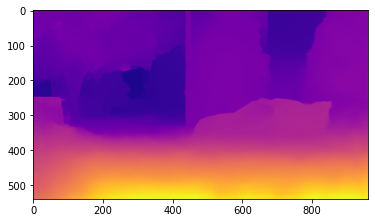

In [168]:
plt.imshow(single_base_prediction, cmap='plasma')

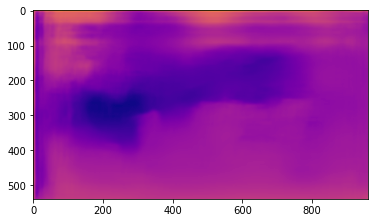

In [169]:
plt.imshow(single_prediction, cmap='plasma')

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'> (540, 960) 269.51248 1.3612565
<class 'numpy.ndarray'> (540, 960, 1) 136.21957 8.473375


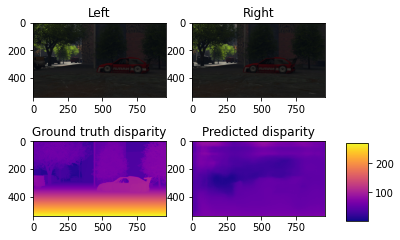

In [170]:
print(type(sample['left']))
print(type(sample['right']))
print(type(disp_gt), disp_gt.shape, disp_gt.max(), disp_gt.min())
print(type(single_prediction), single_prediction.shape, single_prediction.max(), single_prediction.min())

single_prediction = single_prediction.squeeze()

single_prediction = np.where(disp_gt > 0, single_prediction, 0)

figure = utils.plot_and_save_figure(sample['left'], sample['right'], disp_gt, single_prediction)

In [171]:
print((disp_gt - single_prediction).max())

218.65465


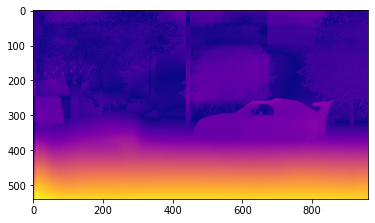

In [172]:
plt.imshow(np.abs(disp_gt - single_prediction), cmap='plasma')

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'> 269.51248 1.3612565
<class 'numpy.ndarray'> 247.62415 9.079294


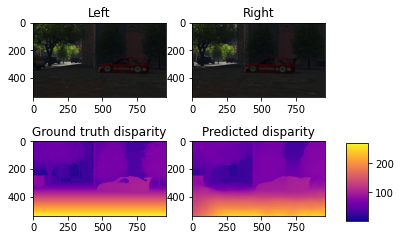

In [173]:
print(type(sample['left']))
print(type(sample['right']))
print(type(disp_gt), disp_gt.max(), disp_gt.min())
print(type(single_base_prediction), single_base_prediction.max(), single_base_prediction.min())

# figure = utils.plot_figure(sample['left'], sample['right'], disp_gt[0], single_base_prediction)
figure = utils.plot_figure(sample['left'], sample['right'], disp_gt, single_base_prediction)